In [1]:
import os, glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image, display

import sys
sys.path.append('..')
import helpers, datasets, surfaces, matrices

sns.set_style('ticks')

/home/asaberi/laminar_organization/env/lib/python3.9/site-packages/nilearn/input_data/__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


In [2]:
default_ltcg = surfaces.MicrostructuralCovarianceGradients(matrices.MicrostructuralCovarianceMatrix('thickness', similarity_metric='euclidean'))

Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer1000_curv-smooth-10_exc-adysgranular_metric-euclidean/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer1000_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer1000_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz


## Three-layer model

With suprarganular, granular and infragranular layers

In [3]:
three_layer_ltc = matrices.MicrostructuralCovarianceMatrix('thickness', merge_layers=[[0,1,2], [3], [4,5]], similarity_metric='euclidean')
three_layer_ltcg = surfaces.MicrostructuralCovarianceGradients(three_layer_ltc)

Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer1000_curv-smooth-10_exc-adysgranular_merge-012-3-45_metric-euclidean/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer1000_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer1000_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz


/home/asaberi/laminar_organization/env/lib/python3.9/site-packages/brainspace/plotting/surface_plotting.py:437: RuntimeWarning: Running plot_hemispheres without a display may result in a crash. For a workaround please consult https://github.com/MICA-MNI/BrainSpace/issues/66. To suppress this warning set suppress_warnings=True.
  warnings.warn(


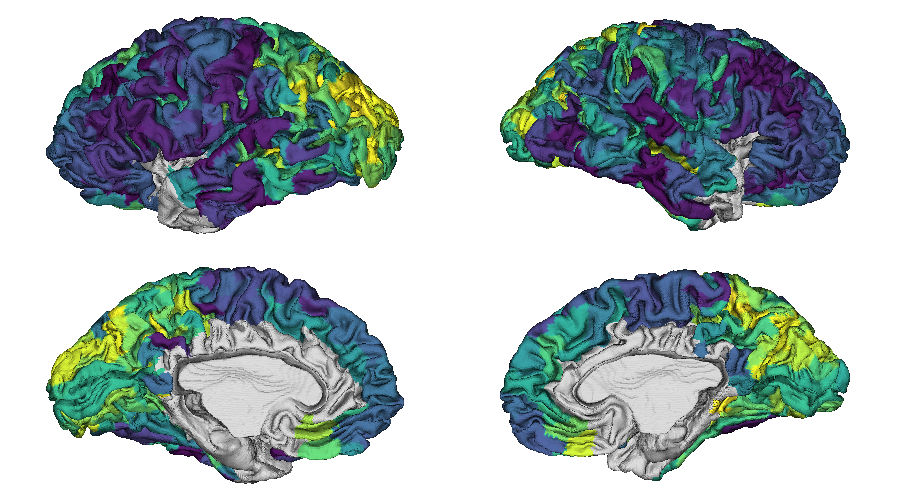

In [4]:
three_layer_ltcg.plot(columns=['LTC G1'], layout_style='grid')

Calculating correlations with variogram test (parcellated)
Surrogates already exist in /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer1000_curv-smooth-10_exc-adysgranular_metric-euclidean/gradients_approach-pca_kernel-normalized_angle_sparsity-09_n-10/variogram_surrogates_LTC G1_nperm-1000_nparcels-889.npz and have the same parcels


(          LTC G1
 LTC G1  0.851678,
         LTC G1
 LTC G1     0.0)

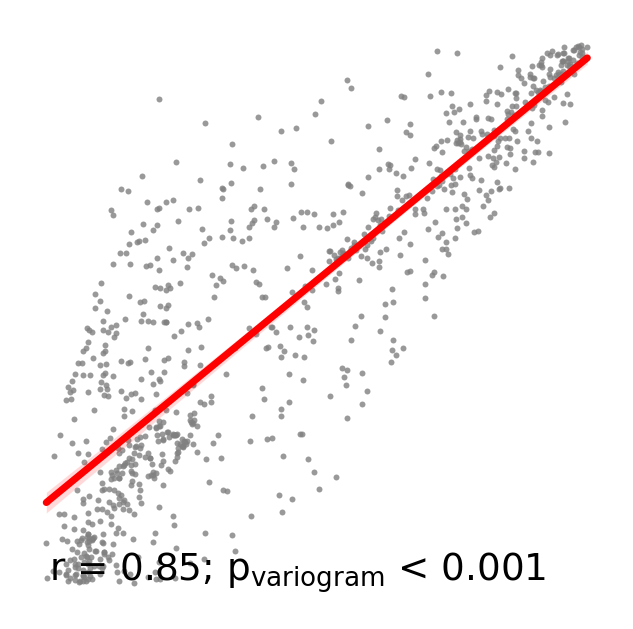

In [5]:
default_ltcg.correlate(three_layer_ltcg, x_columns=['LTC G1'], y_columns=['LTC G1'], axis_off=True)

Calculating correlations with variogram test (parcellated)
Surrogates already exist in /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer1000_curv-smooth-10_exc-adysgranular_merge-012-3-45_metric-euclidean/gradients_approach-pca_kernel-normalized_angle_sparsity-09_n-10/variogram_surrogates_LTC G1_nperm-1000_nparcels-889.npz and have the same parcels

Correlation coefficients


,LTC G1
Supragranular,0.690245
Granular,0.184794
Infragranular,-0.728336



p-values


,LTC G1
Supragranular,0.0
Granular,0.0
Infragranular,0.0


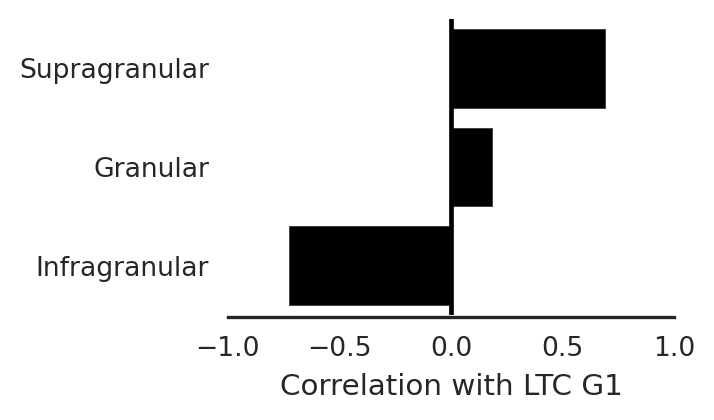

In [6]:
laminar_features = surfaces.LaminarFeatures(parcellation_name='schaefer1000')
laminar_features.columns = np.array([p.replace(' relative thickness', '') for p in laminar_features.columns])
laminar_features.parcellated_data.columns = laminar_features.columns
r, p = three_layer_ltcg.correlate(
    laminar_features, 
    x_columns=['LTC G1'], 
    y_columns=['Supragranular', 'Granular', 'Infragranular'],
    regplot=False
)
print("\nCorrelation coefficients")
display(r)
print("\np-values")
display(p)